In [98]:

import torchvision
import torch
from torchvision import datasets, transforms
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import logsumexp
import math

MAX_ITER = 100
EPSILON = 1e-10
TOLERANCE = 1e-5

def initializeModel(K, d):
    np.random.seed(0)
    pi = np.random.rand(K)
    pi = pi / np.sum(pi)

    np.random.seed(0)
    mu = np.random.normal(0, 3, size=(K, d))

    np.random.seed(0)
    S = np.random.rand(K, d) + 0.5

    return pi, mu, S

def GMM(X, K_RANGE):
    N, d = X.shape
    pi, mu, S = initializeModel(K_RANGE, d)
    log_r = np.zeros((N, K_RANGE))
    loss = [0.0] * MAX_ITER

    for iter in range(MAX_ITER):
        for k in range(K_RANGE):
            print(k)
            for i in range(N):
                log_prob = np.log(pi[k])
                for j in range(d):
                    # print(k, i, j)
                    if math.isclose(S[k,j], 0, rel_tol=1e-05, abs_tol=1e-08):
                        if math.isclose(X[i,j], mu[k,j], rel_tol=1e-05, abs_tol=1e-08):
                            mus = np.argwhere(np.isclose(mu[:,j], mu[k,j])).flatten()
                            sigmas = np.argwhere(np.isclose(S[:,j], 0)).flatten()
                            num_models = len(np.intersect1d(mus, sigmas))
                            log_prob += np.log(1/num_models)
                        else:
                            log_prob = float('-inf')
                            break
                    else:
                        log_prob += -0.5 * np.log(S[k][j]) - 0.5 * (X[i][j] - mu[k][j]) ** 2 / S[k][j]
                log_r[i,k] = log_prob
                # log_r[:,k] = np.log(pi[k]) - 0.5 * np.sum(np.log(S[k] + EPSILON)) - 0.5 * np.sum((X-mu[k]) ** 2 / (S[k] + EPSILON), axis = 1)
        log_r_i = logsumexp(log_r, axis = 1)
        log_r = log_r - log_r_i[:,None]
        loss[iter] = -np.sum(log_r_i)
        print(loss[iter])
        if iter > 1 and abs(loss[iter] - loss[iter-1]) <= TOLERANCE * abs(loss[iter]):
            break

        r = np.exp(log_r)
        r_dot_k = np.sum(r, axis = 0)
        pi = r_dot_k / N
        mu = np.matmul(r.T, X) / r_dot_k[:,None]
        S = np.matmul(r.T, X**2) / r_dot_k[:,None] - mu ** 2

    return pi, mu, S, loss

transform = transforms.Compose([transforms.ToTensor()])


In [93]:
X = np.loadtxt(open("gmm_dataset.csv", "rb"), delimiter=",")
k = 9
pi, mu, S, loss = GMM(X, k+1)

261008.82346180442
36897.77118646569
34512.22212583357
34439.29384103234
34410.58470092027
34400.383627484305
34389.8237164219
34377.84004504634
34374.565162180836
34371.86610414948
34369.78172299848
34368.236563090584
34367.10396476455
34366.26498432356
34365.62893270875
34365.132831869414
34364.73519736855
34364.40948402641


0
596774.8192666939
69939.41787313457
69939.41787313457
1
563408.8942592521
68660.23801643334
67864.70370654194
65323.76183005182
62427.02873148951
60651.56047071038
58273.59931778928
58105.23918639046
58105.13225799886
2
464839.4723160267
56328.54085412846
53815.64941934867
51936.751039740746
51670.609282975915
51670.13914384284
3
312103.9306769783
53321.10353293078
52689.64990129708
52345.19748363776
50321.36537233923
44715.021360421364
41560.9005996178
41554.0713841098
41554.07119920617
4
265853.2642504199
36563.253491838776
34513.090992994476
34512.11720827206
34512.117207288626
5
266879.4009627203
36563.24661354809
34512.48121894797
34508.4902894641
34508.25377997905
6
259199.92947618768
36905.862965002525
34553.996386908
34503.86226056954
34494.32206705821
34489.10577054567
34485.03865928747
34481.4425193261
34478.252724705366
34475.57248264838
34473.45886876082
34471.86166992527
34470.67128008481
34469.777354810976
34469.09265004875
34468.554709944554
34468.12123133335
34467.764

Text(0, 0.5, 'Negative Log Likelihood')

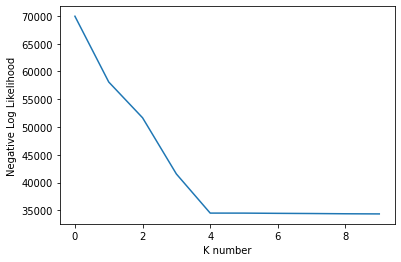

In [94]:
X = np.loadtxt(open("gmm_dataset.csv", "rb"), delimiter=",")

K = 10
pis, mus, Ss, losses = [[None for _ in range(K)] for _ in range(4)]
for k in range(10):

    print(k)
    pi, mu, S, loss = GMM(X, k+1)
    pis[k] = pi
    mus[k] = mu
    Ss[k] = S
    losses[k] = [ val for val in loss if val > 0.0]

final_losses = [loss[-1] for loss in losses]
plt.plot(final_losses)
plt.xlabel("K number")
plt.ylabel("Negative Log Likelihood")

In [4]:
choose_of_k = 4

print(f"Choose k to be {choose_of_k}")

models = [None] * choose_of_k
for k in range(choose_of_k):
    models[k] = (pis[choose_of_k][k], mus[choose_of_k][k], Ss[choose_of_k][k])
models.sort()
for i, model in enumerate(models):
    print(f"Model {i} with weights {model[0]}")

    print(f"Mean {model[1]}")

    print(f"Covariance {model[2]}")



Choose k to be 4
Model 0 with weights 0.09965520915997991
Mean [ 1.68895041  0.40338202  0.99211504  2.35056805  1.88562892 -0.96182475
  0.88561463 -0.19120951 -0.08586713  0.34107486  0.03539807  1.39643336
  0.73745184  0.10991832  0.42385499  0.32854659  1.46428576 -0.21035102
  0.29018548 -0.84663937]
Covariance [1.72187489 1.19321115 1.41173601 0.88740145 1.17525991 2.04880334
 0.38433712 0.67911139 1.82800002 1.53834581 1.75403135 0.88254847
 0.79972224 1.97868057 0.26419276 0.82525867 0.95488864 0.13978608
 0.55880436 0.91594801]
Model 1 with weights 0.09999844236706176
Mean [-2.56304802  0.60297421  0.90734869 -0.70992474  2.30623825 -1.43950453
  0.0635028  -0.18417534  1.51898971  1.47009916  0.13308313  0.40691041
 -0.8539717  -1.97684461 -0.32116845  0.18215543  1.2224895   1.21355931
 -0.44231741 -0.3195731 ]
Covariance [0.35688103 1.08291111 0.28247171 1.32691967 0.68869621 0.14906731
 0.40732567 1.79175932 0.76375603 0.39091032 0.64949237 0.55132451
 0.61076607 0.031462

In [96]:
root = './data'
train_data = datasets.MNIST(root = root, train= True, transform=None, download=True)
test_data = datasets.MNIST(root = root, train= False, transform=None, download=True)

train_X = train_data.data
train_Y = train_data.targets
train_X = np.reshape(train_X, (60000, 784))
test_X = test_data.data
test_Y = test_data.targets
test_X = np.reshape(test_X, (10000, 784))

from sklearn.decomposition import PCA 

d = 40

reducer = PCA(n_components=d)
reducer.fit(train_X)

train_data_reduced = reducer.transform(train_X)
test_data_reduced = reducer.transform(test_X)

label_set = set(train_Y)
train_Y = train_Y.numpy()
test_Y = test_Y.numpy()

In [99]:
K_RANGE = 10
from sklearn.decomposition import PCA
pca = PCA()
# for k in range(K_RANGE):
class_models = [None] * 10
p_y_c = [0] * 10
for identify_class in range(1):
    TOTAL_DATA = len(train_X)
    idx = train_Y == identify_class
    X = train_X[idx].numpy().astype('float64')
    pi, mu, S, loss = GMM(X, 5)
    class_models[identify_class] = (pi, mu, S)

0
1
2
3
4
24574541637.290367
0
1
2
3
4
14794575.246432249
0
1
2
3
4
14142349.84553546
0
1
2
3
4
13938573.354470957
0
1
2
3
4
13899923.49074706
0
1
2
3
4
13904530.965605862
0
1
2
3
4
13897168.766994346
0
1
2
3
4
13883479.89052824
0
1
2
3
4
13862108.536334217
0
1
2
3
4
13871344.952128578
0
1
2
3
4
13858366.90200368
0
1
2
3
4
13886388.588723645
0
1
2
3
4
13878382.761481022
0
1
2
3
4
13865591.719790988
0
1
2
3
4
13876875.387554254
0
1
2
3
4
13884349.040250972
0
1
2
3
4
13879658.350144846
0
1
2
3
4
13884507.498803778
0
1
2
3


KeyboardInterrupt: 

In [70]:
print(math.isclose(-4.440892098500626e-16, 0, rel_tol = 1e05, abs_tol=1e-8))
print(np.isclose(-4.440892098500626e-16, 0, rtol = 1e05, atol=1e-8))

True
True


In [13]:
# Test
data_test = datasets.MNIST(root = "./data/",
                            transform=transform,
                            train = False,
                            download = True)
error = 0
for x, y in data_test:
    N, d1, d2 = x.shape
    x = x.reshape(N, d1*d2).numpy() / 255.0
    y_probs = np.zeros(10)
    for class_c in range(10):
        pi, mu, S = class_models[class_c]
        log_p_ik = np.log(pi) - 0.5 * np.sum(np.log(S + EPSILON), axis=1) - 0.5 * np.sum((x-mu) ** 2 / (S + EPSILON), axis = 1)
        log_p = logsumexp(log_p_ik)
        y_probs[class_c] = log_p + np.log(p_y_c)
    y_pred = np.argmax(y_probs)
    if y_pred != y:
        error += 1
print(f"Error rate {error/len(data_test)}")


/var/folders/5r/zcfkkyt11zq3gym2pkmxs8380000gn/T/ipykernel_21201/3250235856.py:13: RuntimeWarning: divide by zero encountered in log
  log_p_ik = np.log(pi) - 0.5 * np.sum(np.log(S + EPSILON), axis=1) - 0.5 * np.sum((x-mu) ** 2 / (S + EPSILON), axis = 1)


Error rate 0.6815


In [11]:
def GMM(X, K_RANGE):
    """
    EM Step
    """
    n, d = X.shape

    weights, means, sigmas = initializeModel(K_RANGE, d)
    loss_hist = []
    rlog = np.zeros((n, K_RANGE))
    r = np.zeros((n, K_RANGE))
    for it in range(MAX_ITER):
        ###########
        # E Step
        ###########
        for k in range(K_RANGE):

            # Updating rik
            partition = np.log(weights[k]+EPSILON) - 0.5*np.log(sigmas[k, :]+EPSILON).sum()
            s = 1/ (sigmas[k, :] + EPSILON)
            delta = X - means[k][np.newaxis, :]
            exp_term = np.sum(delta * delta * s[np.newaxis, :], axis = -1)
            rlog[:, k] = -0.5 * exp_term + partition

        # Normalize
        rlogsum = []
        for i in range(n):
            ri_log = logsumexp(rlog[i])
            rlogsum.append(ri_log)
        rlogsum = np.array(rlogsum)
        assert rlogsum.shape == (n,)
        rlogsum = np.array(rlogsum)
        rlog = rlog - rlogsum[:, np.newaxis]
        loss = -np.sum(rlogsum)
        loss_hist.append(loss)

        
        # Convert back to exp form
        for i in range(n):
            for k in range(K_RANGE):
                r[i, k] = np.exp(rlog[i, k])
        
        if it > 0 and abs(loss_hist[-1] - loss_hist[-2]) <= TOLERANCE * abs(loss_hist[-1]):
            break

        ###########
        # M Step
        ###########
        rsum = np.sum(r, axis = 0)
        weights = rsum/n

        for k in range(K_RANGE):
            means[k, :] = np.sum(r[:, k, np.newaxis] * X, axis = 0) / (rsum[k] + EPSILON)
            sigmas[k, :] = np.sum(r[:, k, np.newaxis] * X * X, axis = 0) / (rsum[k] + EPSILON) - means[k, :] * means[k, :]

    return weights, means, sigmas, loss_hist

In [70]:
X = np.array([[1,0,3], [2,0,0]])
Y = np.array([1,0,3])
m = np.argwhere(Y == 0)
m.shape
print(X[:,1])
vars = np.argwhere(X[:,1]==0).flatten()
vars
X[0,2]
# default_prob = [1 / len(var) if len(var) != 0 else 0 for var in vars]
# default_prob

[0 0]


3

In [61]:
float('-inf')
temp = np.array([float('-inf'), 1, 2])
logsumexp(temp)
np.log(np.exp(1)+np.exp(2))

2.313261687518223

In [ ]:



np.sum(r[:, k, np.newaxis] * X * X, axis = 0) / (rsum[k] + eps) - means[k, :] * means[k, :]

In [118]:
N, K, D = 5,3,4

means = np.zeros((K,D))
means[[0,1], :] = np.array([[1,2,3,4], [6,7,8,9]])
print(means)
means[1,:] * means[1, :]

r = np.array([[1,2,3,4,8],[6,2,2,3,1],[1,2,3,4,5]]).T
print(r)
X = np.array([[1,0,3,7],[2,0,4,7],[3,0,9,2],[4,0,5,1],[5,0,9,2]])
print(X)

r[:, 0, None]

[[1. 2. 3. 4.]
 [6. 7. 8. 9.]
 [0. 0. 0. 0.]]
[[1 6 1]
 [2 2 2]
 [3 2 3]
 [4 3 4]
 [8 1 5]]
[[1 0 3 7]
 [2 0 4 7]
 [3 0 9 2]
 [4 0 5 1]
 [5 0 9 2]]


array([[1],
       [2],
       [3],
       [4],
       [8]])